In [311]:
# All the required imports
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

warnings.filterwarnings("ignore")

In [46]:
# Read the data:
songs = pd.read_csv('top2018.csv')

# Check the top few rows:
songs.head(10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.5520,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.1230,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.1310,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.1120,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.3960,0.350,91.030,217925.0,4.0
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.3540,0.000000,0.1360,0.374,145.028,231267.0,4.0
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.0990,0.000000,0.3720,0.650,136.048,253390.0,4.0
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.0370,0.000022,0.0814,0.592,123.994,214847.0,4.0
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.0403,0.000000,0.0824,0.510,97.028,217947.0,4.0
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.2050,0.000000,0.1280,0.534,95.079,202621.0,4.0


In [47]:
# Check the basic information related to the data:
songs.info()

# We can extract the following from this information:
# 1. There are 100 observations and 16 different characteristics
# 2. There are no missing values in the dataset
# 3. Data Types:
#    There are three object types: (id, name, artist) => Qualitative data (Nominal)
#    There are 13 float object types => Quantitative data (Continuous)
# 4. The data uses around 13 KB of memory.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
id                  100 non-null object
name                100 non-null object
artists             100 non-null object
danceability        100 non-null float64
energy              100 non-null float64
key                 100 non-null float64
loudness            100 non-null float64
mode                100 non-null float64
speechiness         100 non-null float64
acousticness        100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
valence             100 non-null float64
tempo               100 non-null float64
duration_ms         100 non-null float64
time_signature      100 non-null float64
dtypes: float64(13), object(3)
memory usage: 12.6+ KB


In [48]:
# The songs are arranged in the order of their popularity. As the Id is not the actual rank of the song.
# Appending an other column rank just for the sake of ranking the songs.
songs['rank'] = list(range(1, 101))

# Now check the top few rows again to check if the rank is associated properly
songs.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0,2
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0,3
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0,5


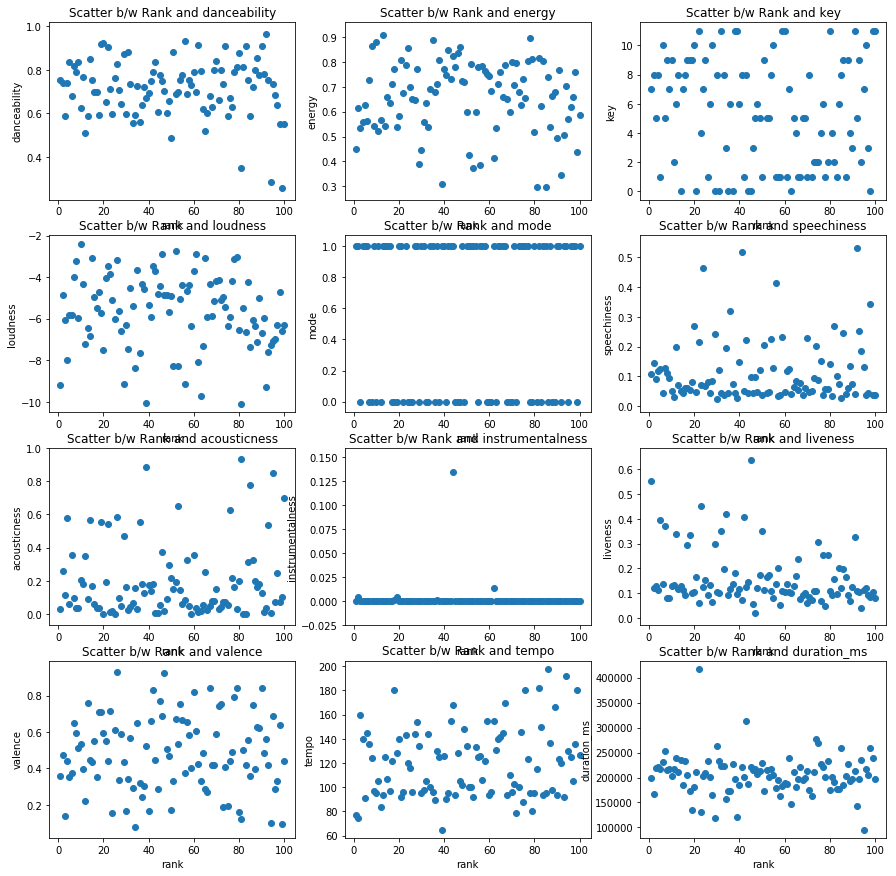

In [114]:
# Just check the scatter plots of multiple features with their rankings:
song_props = songs.columns[3:16]
rank = songs['rank']

fig, axes = plt.subplots(nrows=4, ncols=3)
fig.set_size_inches(15, 15)
for ax, col in zip(axes.flat, song_props):
    ax.scatter(rank, songs[col])
    ax.set_title("Scatter b/w Rank and {0}".format(col))
    ax.set_xlabel('rank')
    ax.set_ylabel(col)
    
# By simply observing the plot, we can say that there is no specific pattern between the rank of the song and 
# the characteristic of the song. So moving on to find the correlation between the characteristics.

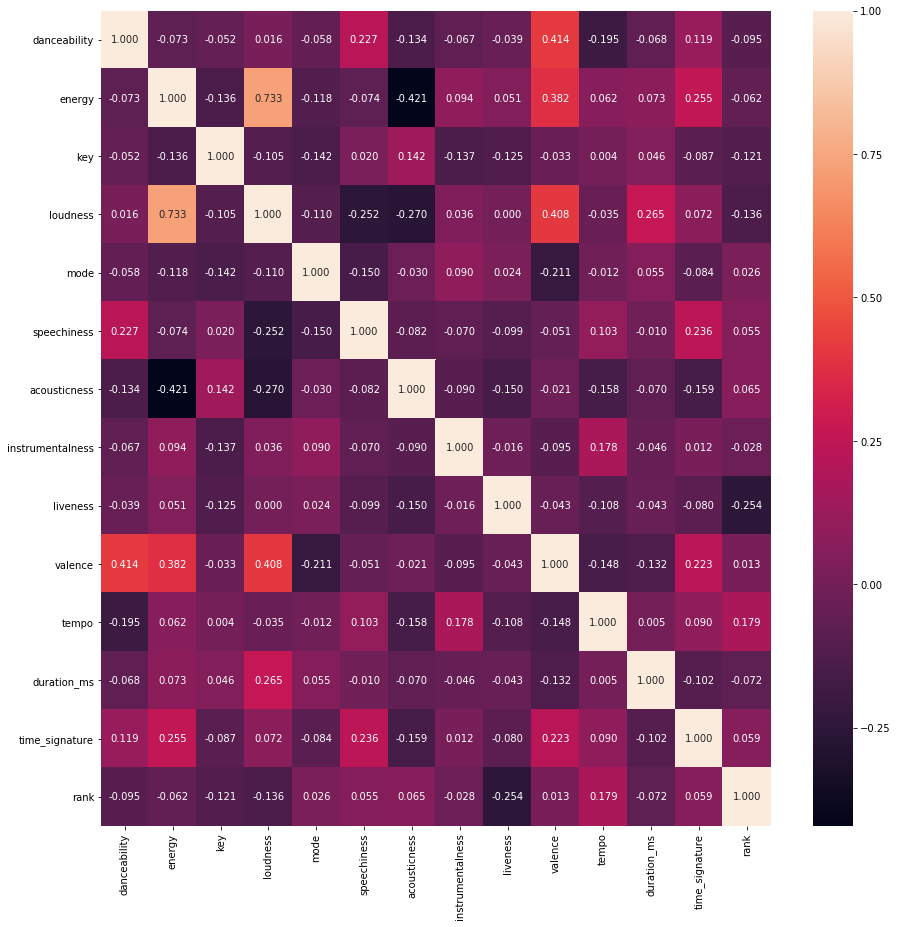

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,rank
danceability,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413855,NaN,NaN,NaN,NaN
energy,NaN,1.000000,NaN,0.732719,NaN,NaN,NaN,NaN,NaN,0.382434,NaN,NaN,NaN,NaN
key,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loudness,NaN,0.732719,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.407760,NaN,NaN,NaN,NaN
mode,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speechiness,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acousticness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instrumentalness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
liveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
valence,0.413855,0.382434,NaN,0.407760,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [103]:
# Get the correlation matrix for all the characteristics of the songs:
corr_coeff = songs.corr()

fig = plt.figure(figsize=[15, 15])
# Observe the heat map to fetch more correlated characters:
sns.heatmap(songs.corr(), annot=True, fmt='.3f')
plt.show()

# From the heatmap, we can observe that the most correlated characters are (loudness, energy)
# Based on the observation, we can pick the cutoff value of correlation value as 0.35
corr_coff[corr_coff > 0.35]

# Strong positive correlation > 0.35 :
# (danceability, valence)
# (energy, loudness)
# (energy, valence)
# (loudness, valence)

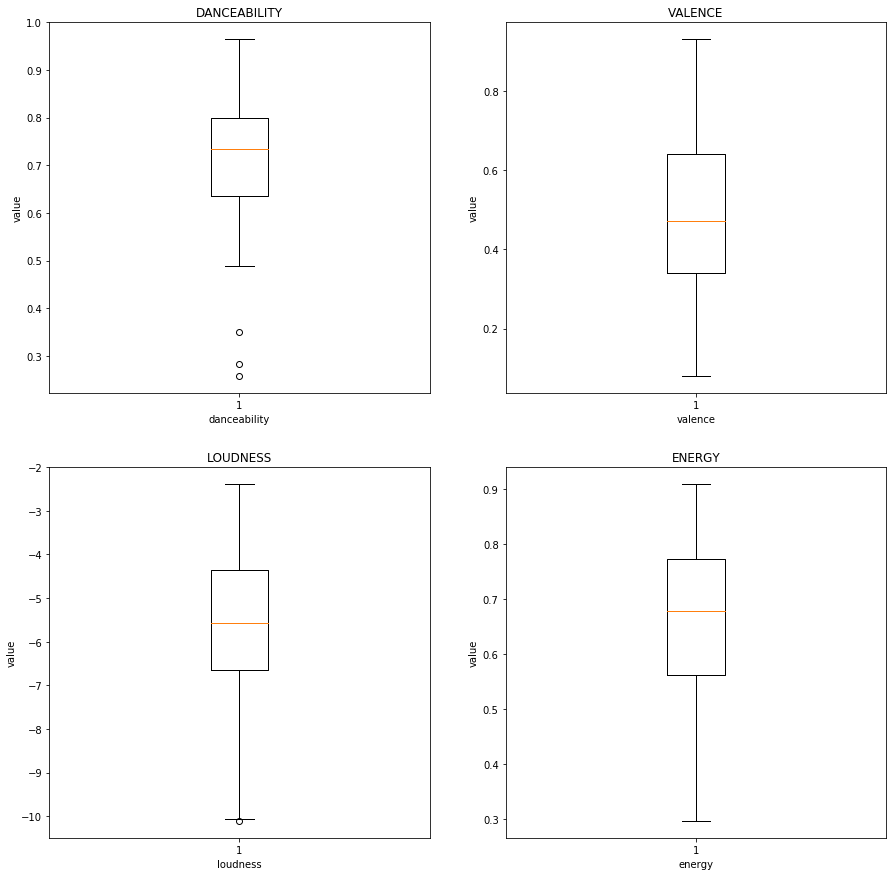

In [108]:
# Based on the past observation, we can pick the following characters for our further analysis:
# danceability, valence, loudness, energy
picked_cols = ["danceability", "valence", "loudness", "energy"]

# Just check for any outliers from all the picked characters
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 15)
for ax, col in zip(axes.flat, picked_cols):
    ax.boxplot(songs[col])
    ax.set_title(col.upper())
    ax.set_xlabel(col)
    ax.set_ylabel("value")

In [309]:
# Utility functions for plotting:
def remove_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    good_data = data[(data > (q25 - 1.5 * iqr)) & (data < (q75 + 1.5 * iqr))]
    return good_data

def plot_histogram(axis, col):
    col = np.sort(col)
    fit = stats.norm.pdf(col, np.mean(col), np.std(col))
    axis.plot(col, fit, '-o')
    n, bins, pat = axis.hist(col, normed=True)
    stats.skew(col)
    axis.text(x=max(col), y=max(n), 
              s="Skewness: %f" % stats.skew(col),
              horizontalalignment='right',
              color='xkcd:poo brown')

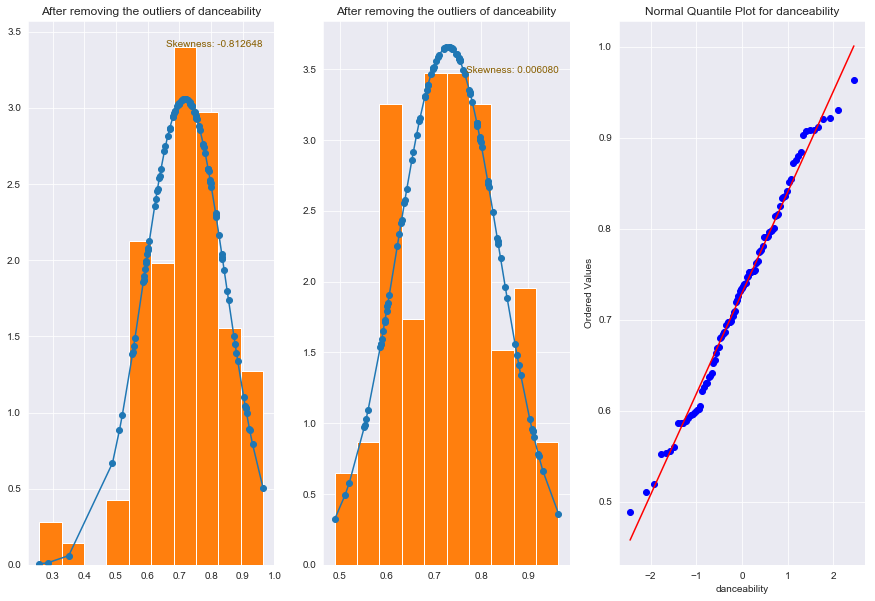

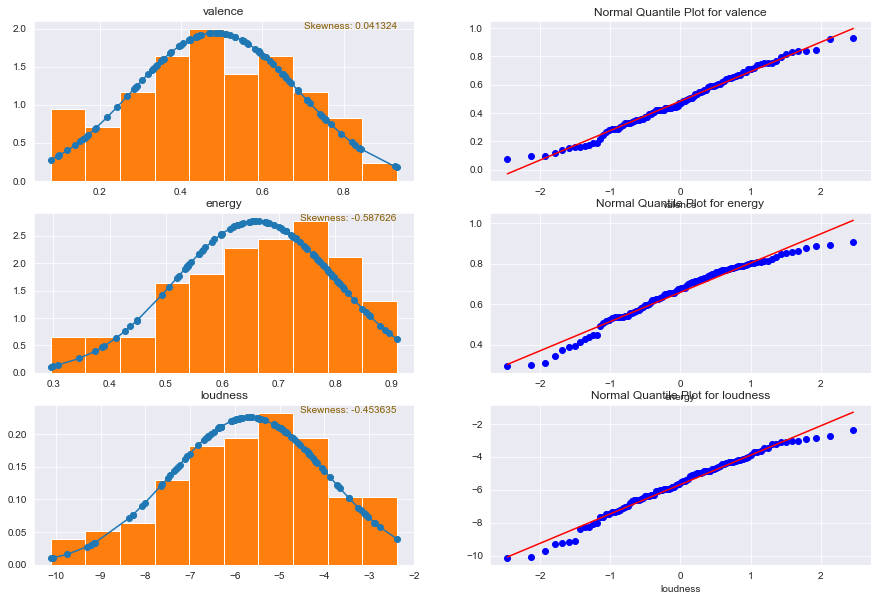

In [346]:
# Lets dig deep into the distributions of the different characters of the song:

# From the boxplots, we can observe that the "danceability" has got some outliers
# Below figures help us to understand the frequency distributions before and after removal of outliers
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(15, 10)
col = 'danceability'
for ax, dat in zip(axes, [songs[col], remove_outliers(songs[col])]):
    if i == 0:
        ax.set_title("Before removing the outliers of {0}".format(col))
    else:
        ax.set_title("After removing the outliers of {0}".format(col))
    plot_histogram(ax, dat)

# Construct the normal quantile plot after removing the outliers
nor_ax = axes[2]
stats.probplot(remove_outliers(songs['danceability']), dist="norm", plot=nor_ax)
nor_ax.set_title("Normal Quantile Plot for {0}".format(col))
nor_ax.set_xlabel("{0}".format(col))

    
# All the other characters doesn't have any outliers, so the distrubutions will look like below:
other_cols = ['valence', 'energy', 'loudness']
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15, 10)
axes_iter = iter(axes.flat)
for ax, col in zip(axes_iter, other_cols):
    # Plot the histogram
    plot_histogram(ax, songs[col])
    ax.set_title(col)
    
    # Plot the normal quantile plot
    nor_ax = next(axes_iter)
    stats.probplot(songs[col], dist="norm", plot=nor_ax)
    nor_ax.set_title("Normal Quantile Plot for {0}".format(col))
    nor_ax.set_xlabel("{0}".format(col))
    nor_ax.set_ylabel("")
    
# NORMALITY ASESSMENT:
# 1. Close to the bell curve
# 2. Number of outliers are less than 1
# 3. Using Normal Quantile Plots: data points are close to the straight line

In [360]:
# CLAIM: In the recent times, the songs are mojorly composed of Energy 

# HYPOTHESIS TEST: 

# STEP-1: Symbolic form of the claim
# To validate the claim, we are conducting a hypothesis test to see if the songs have mean_energy > 0.5

# STEP - 2 & 3: Symbolic form of alternative claim and 
# mean_energy = 0.5;
# H0: mean_energy = 0.5; H1: mean_energy > 0.5

# STEP - 4: Significance Level
# Considering the significance level of alpha = 0.05

# ALL THE DIFFERENT PARAMETERS:
n = 100 # Size of the sample
popmean = 0.5 # Population mean
sample = songs['energy'] # Extract the energies of the sample songs
mean_energy_of_sample = np.mean(sample) # Mean of the sample
sd_energy_of_sample = np.std(sample) # standard deviation of the sample

# STEP - 5:  Identify the test statistic
# Because the claim is made about the population mean m, the sample statistic
# most relevant to this test is the sample mean x, and we use the t distribution.

# Requirements:
# 1. Either the data is normally distributed or n > 30 [According to sample, energy is normal and sample size is > 30]
# 2. The sample must be simple random # Fail
# 3. The sample is independent

# STEP - 6: Calculate the P-value
print(stats.ttest_1samp(songs['energy'], 0.5))

# STEP - 7: Make a decision
# The above statement results in the sample statistic and pvalue as follow:
# Ttest_1sampResult(statistic=10.964576604381161, pvalue=8.713371408794922e-19)
# As the P-value is less than alpha, we can reject the null hypothesis and can simply state that,

# STEP - 8: Restate the decision
# THERE IS SUFFICIENT EVIDENCE TO SUPPORT THE CLAIM THAT 
# THE SONG SHOULD BE MAJORLY COMPOSED OF ENERGY TO BE MORE POPULAR.

Ttest_1sampResult(statistic=10.964576604381161, pvalue=8.713371408794922e-19)


In [370]:
# Confidence interval estimations of the mean:

energy = songs['energy']
mean_energy = np.mean(energy) # OUTPUT: 0.6590600000000001
sd_energy = np.std(energy)
stats.norm.interval(0.05, loc=mean_energy, scale=sd_energy)
# OUTPUT: (0.6500089034979014, 0.6681110965020988)

# To be more specific, even with the confidence interval method:
# The mean of the sample ~ 0.659 is in the range of (0.650, 0.668), which is CI with confidence level of 95%

(0.6500089034979014, 0.6681110965020988)